In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.shape

(22, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [5]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
dtype: bool

In [7]:
df.nunique()

Name         22
Age          14
Income($)    22
dtype: int64

In [8]:
df.corr(numeric_only= True)

,Age,Income($)
Age,1.000000,0.496856
Income($),0.496856,1.000000


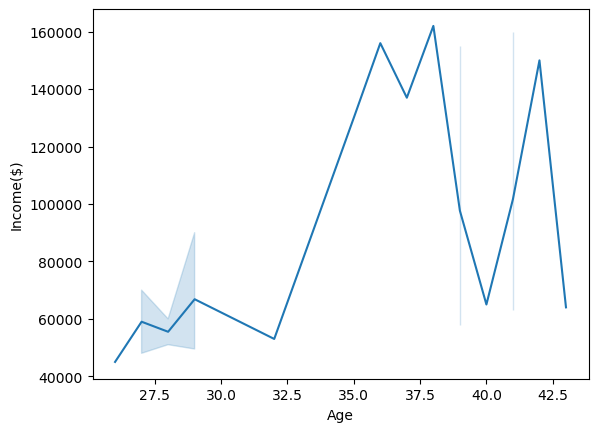

In [9]:
sns.lineplot(data = df, x ='Age', y = 'Income($)')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_2588\599984496.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=True)


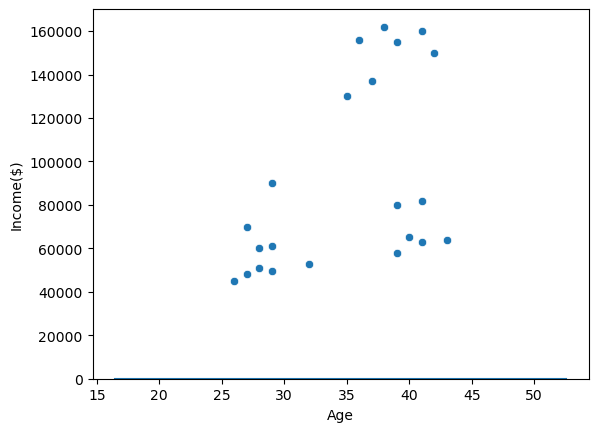

In [10]:
sns.scatterplot(x='Age', y='Income($)', data=df)
sns.distplot(df['Age'], kde=True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.cluster import KMeans

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

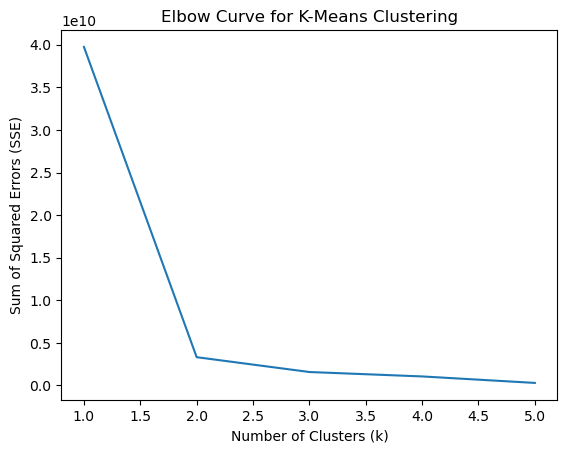

In [13]:
elbow = []
for i in range(1, 6):
    kmc = KMeans(n_clusters=i, max_iter=600)
    kmc.fit(df[['Age', 'Income($)']])
    elbow.append(kmc.inertia_)
plt.plot(range(1, 6), elbow)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve for K-Means Clustering')
plt.show()

### Optimal custers is 2

In [15]:
kmc = KMeans(n_clusters=2, max_iter=600)
kmc.fit(df[['Age', 'Income($)']])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=600, n_clusters=2)

In [16]:
y_hat = kmc.fit_predict(df[['Age','Income($)']])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
df['cluster']=y_hat
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [18]:
kmc.cluster_centers_

array([[3.32000000e+01, 6.26333333e+04],
       [3.82857143e+01, 1.50000000e+05]])

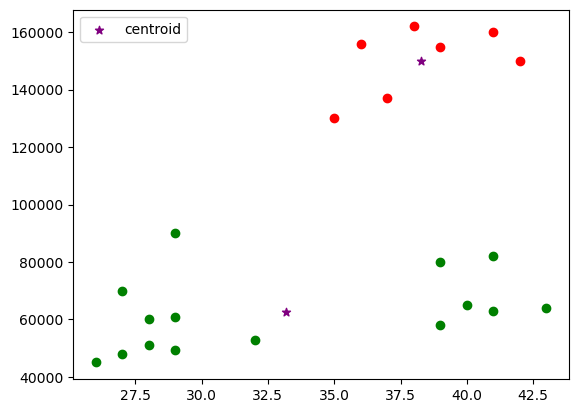

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(kmc.cluster_centers_[:,0],kmc.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.sample(10)

,Name,Age,Income($),cluster
19,Alia,0.764706,0.299145,0
2,Mohan,0.176471,0.136752,0
17,Priyanka,0.882353,0.153846,0
11,Tom,0.000000,0.000000,0
1,Michael,0.176471,0.384615,0
6,David,0.882353,0.982906,1
15,Ranbir,0.352941,0.068376,0
20,Sid,0.882353,0.316239,0
3,Ismail,0.117647,0.128205,0
7,Andrea,0.705882,1.000000,1


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

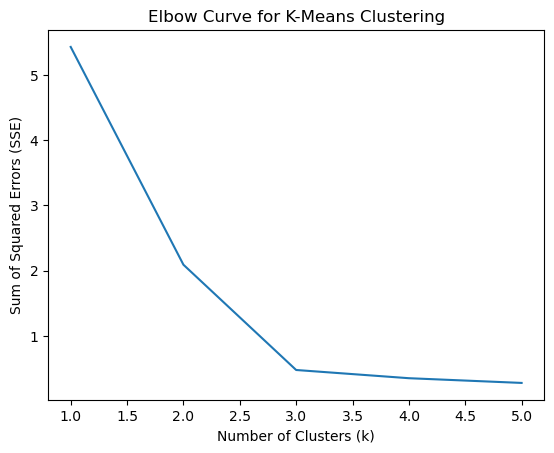

In [21]:
elbow = []
for i in range(1, 6):
    kmc = KMeans(n_clusters=i, max_iter=600)
    kmc.fit(df[['Age', 'Income($)']])
    elbow.append(kmc.inertia_)
plt.plot(range(1, 6), elbow)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve for K-Means Clustering')
plt.show()

### Optimal number of cluster is 3

In [23]:
kmc = KMeans(n_clusters=3)
kmc.fit(df[['Age', 'Income($)']])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
y_outcome = kmc.fit_predict(df[['Age','Income($)']])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
df['cluster']=y_outcome
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [26]:
kmc.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

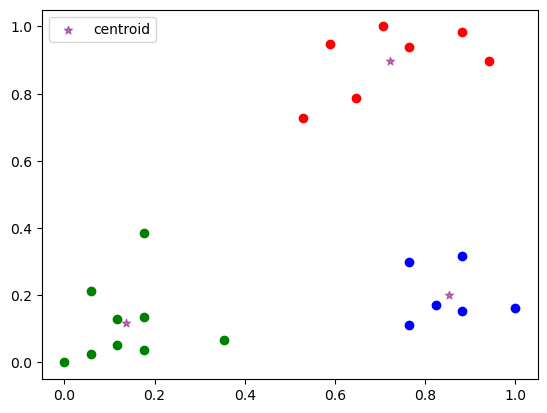

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

plt.scatter(kmc.cluster_centers_[:,0],kmc.cluster_centers_[:,1],color='purple',marker='*',label='centroid', alpha=0.5)
plt.legend()